# Laboratorio 9
*Visualización de datos* <br>

## Mario Cristales - 21631 | Javier Heredia - 21600


## Parte 1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from ydata_profiling import ProfileReport

### Datos de temperatura global desde 1880 hasta 2023

#### a) Exploración de datos

In [96]:
df_temp = pd.read_csv('GLB.Ts+dSST.csv')

In [ ]:
#profile = ProfileReport(df_temp, title="glb")
#profile.to_notebook_iframe()

In [97]:
df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-.23,-.22,-.19,-.18,***,***,-0.12,-0.17,-.20
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-.22,-.19,-.07,-.09,-.10,-.18,0.04,-0.07,-.19
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-.24,-.17,-.36,-.11,-.09,.07,-0.08,-0.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-.12,-.24,-.11,-.18,-.20,-.34,-0.16,-0.10,-.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-.25,-.34,-.31,-.29,-.27,-.11,-0.37,-0.31,-.29


#### Arreglar filas que no tengan el 0 y reemplazar *** con vacío 

In [98]:
df_temp = df_temp.replace(r'(?<!\d)\.', '0.', regex=True)
df_temp = df_temp.replace(r'^-\.', '-0.', regex=True)

df_temp = df_temp.replace('***', 0)

df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19,-0.18,0,0,-0.12,-0.17,-0.20
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29


#### b) Mensaje a transmitir
El mensaje es el cambio de la temperatura global durante los años.
Se hará un promedio de la temperatura anual durante el tiempo y se hará una gráfica con la variación en el transcurso de los años.

#### c) Tipo de gráfica
Gráfica de línea.

#### d) Creación de la gráfica

##### Convertir los meses a float

In [99]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_temp[months] = df_temp[months].astype(float)

df_temp['average'] = df_temp[months].mean(axis=1)

df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,average
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19,-0.18,0,0,-0.12,-0.17,-0.20,-0.177500
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19,-0.090000
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18,-0.110000
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19,-0.175833
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29,-0.285833


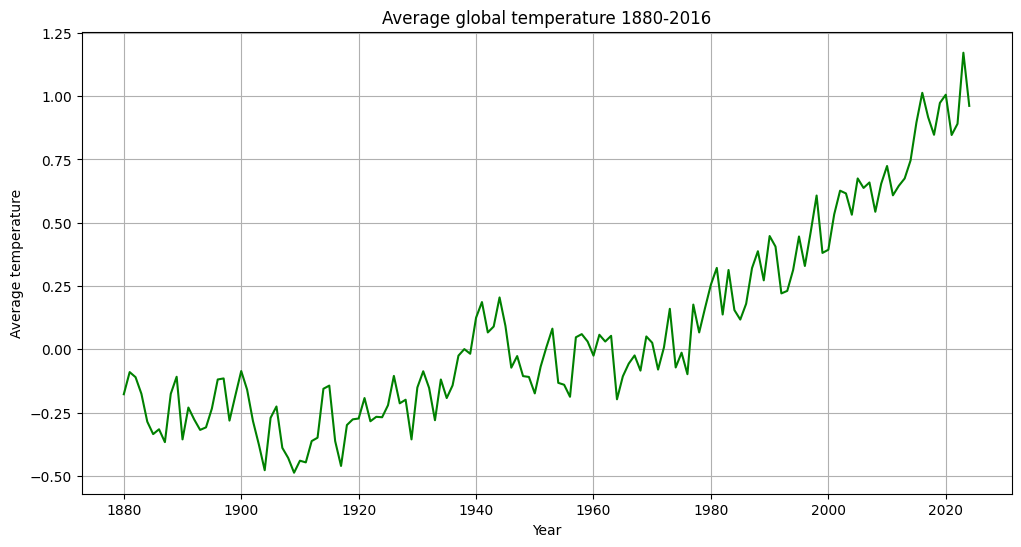

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(df_temp['Year'], df_temp['average'], color='green')
plt.title('Average global temperature 1880-2016')
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.grid(True)
plt.show()

#### e) Optimización de la gráfica
Se optimizó la gráfica para reducir la carga cognitiva, eliminando la cuadrícula y el eje y, ya que no son necesarios para entender la variación de la temperatura global a lo largo de los años.

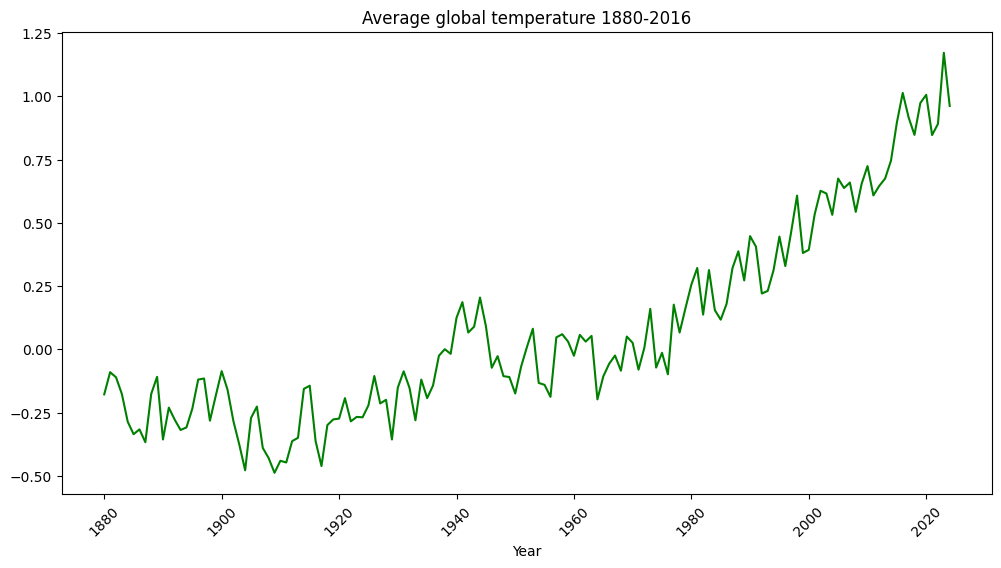

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(df_temp['Year'], df_temp['average'], color='green')
plt.title('Average global temperature 1880-2016')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(True)
plt.show()

#### f) Explicación

Para transmitir la variación de la temperatura global durante los años, se decidió destacar tendencias más generales. Por esta razón, se prefirió utilizar un gráfico de líneas, ya que es una gráfica muy efectiva para mostrar los cambios continuos que ha tenido la temperatura todo este tiempo. Así se muestran de manera efectiva los cambios radicales que pudo llegar a tomar.
Además, para lograr esta visualización se calculó la temperatura anual promedio para poder tener unos datos más simples y concretos y así evitar datos que puedan llegar a ser innecesarios.

Para poder reducir la carga cognitiva, el eje y y el grid han sido eliminados. Ya que en sí la grid no sirve para una gráfica como esta que toma una gran distancia en el sentido del tiempo. El eje y como tal tampoco es necesario pues lo que se quiere ver son los cambios en la tendencia que han surgido.

### Datos de ventas mensuales de una tienda en línea durante los últimos 5 años

#### a) Exploración de datos

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#profile = ProfileReport(df, title="shipping")
#profile.to_notebook_iframe()

#### b) Mensaje a transmitir
Las ciudades a las que mas ventas se han realizado en el año 2020.

#### c) Tipo de gráfica
Gráfico de barras

#### d) Creación de la gráfica

#### Agrupar ciudad y estado

In [28]:
city_state_sales = df.groupby(['City', 'State'])['Sales'].sum().reset_index()
city_state_sales_ordered = city_state_sales.sort_values('Sales', ascending=False)

# Mostrar el resultado
print(city_state_sales_ordered)

              City         State       Sales
377  New York City      New York  252462.547
310    Los Angeles    California  173420.181
514        Seattle    Washington  116106.322
500  San Francisco    California  109041.120
427   Philadelphia  Pennsylvania  108841.749
..             ...           ...         ...
405   Ormond Beach       Florida       2.808
422      Pensacola       Florida       2.214
257        Jupiter       Florida       2.064
162         Elyria          Ohio       1.824
1          Abilene         Texas       1.392

[600 rows x 3 columns]


In [ ]:
city_state_sales_ordered['City_State'] = city_state_sales_ordered['City'] + ', ' + city_state_sales_ordered['State']

ventas = city_state_sales_ordered
ventas.drop(['City', 'State'], axis=1, inplace=True)
ventas

,Sales,City_State
377,252462.547,"New York City, New York"
310,173420.181,"Los Angeles, California"
514,116106.322,"Seattle, Washington"
500,109041.120,"San Francisco, California"
427,108841.749,"Philadelphia, Pennsylvania"
...,...,...
405,2.808,"Ormond Beach, Florida"
422,2.214,"Pensacola, Florida"
257,2.064,"Jupiter, Florida"
162,1.824,"Elyria, Ohio"


#### Redondear las ventas

In [30]:
ventas['Sales'] = ventas['Sales'].astype(int)
ventas

,Sales,City_State
377,252462,"New York City, New York"
310,173420,"Los Angeles, California"
514,116106,"Seattle, Washington"
500,109041,"San Francisco, California"
427,108841,"Philadelphia, Pennsylvania"
...,...,...
405,2,"Ormond Beach, Florida"
422,2,"Pensacola, Florida"
257,2,"Jupiter, Florida"
162,1,"Elyria, Ohio"


<Figure size 1200x600 with 0 Axes>

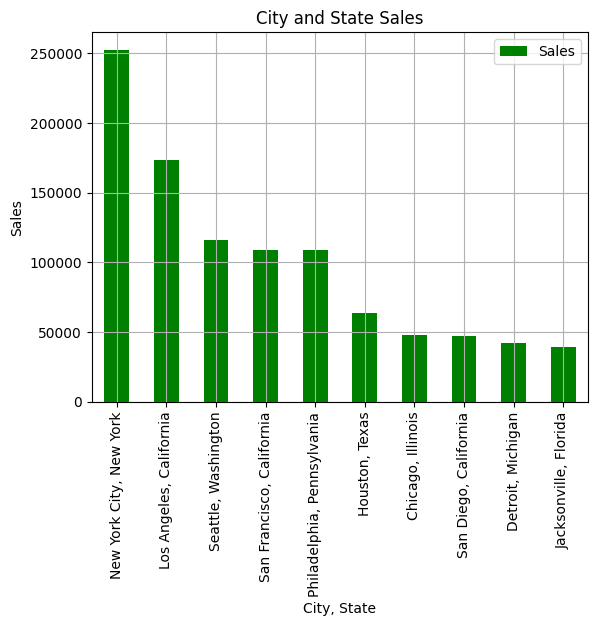

In [32]:
plt.figure(figsize=(12, 6))
ventas.nlargest(10, 'Sales').plot(x='City_State', y='Sales', kind='bar', color='green')
plt.title('City and State Sales')
plt.xlabel('City, State')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### e) Optimización de la gráfica

<Figure size 1600x600 with 0 Axes>

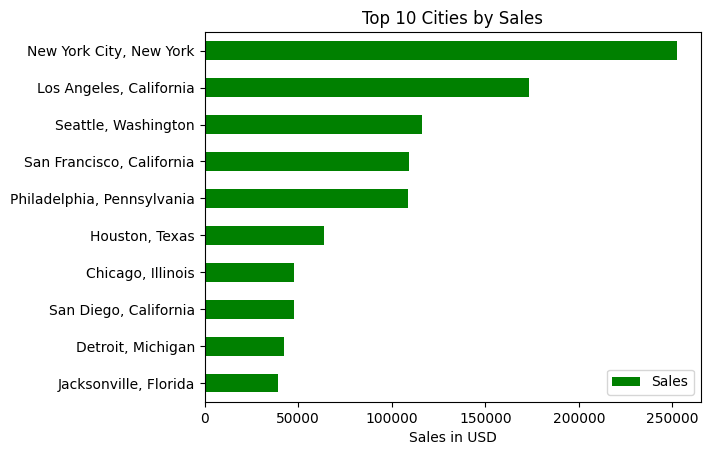

In [33]:
plt.figure(figsize=(16, 6))
ax = ventas.nlargest(10, 'Sales').plot(x='City_State', y='Sales', kind='barh', color='green')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales in USD')
plt.ylabel('')
ax.grid(False)
ax.invert_yaxis()

plt.show()

#### f) Explicación

La mejor forma de representar ventas es a través de barras, ya que se quiere visualizar por cantidades entre distintos campos/categorías. Es por ello que se eligió este gráfico. 

Para reducir la carga cognitiva se quitó la grid y además se decidió voltear la gráfica para que se pueda ver desde arriba hacia abajo qué ciudad vende más.

### Estadísticas de películas y series de Netflix

#### a) Exploración de datos

In [36]:
df = pd.read_csv('netflix_titles.csv')

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#profile = ProfileReport(df, title="netflix")
#profile.to_notebook_iframe()

#### b) Mensaje a transmitir

Más películas y series de Netflix por año

#### c) Tipo de gráfica
Gráfico de barras

#### d) Creación de la gráfica

In [38]:
df_netflix = df['release_year'].value_counts().sort_index()

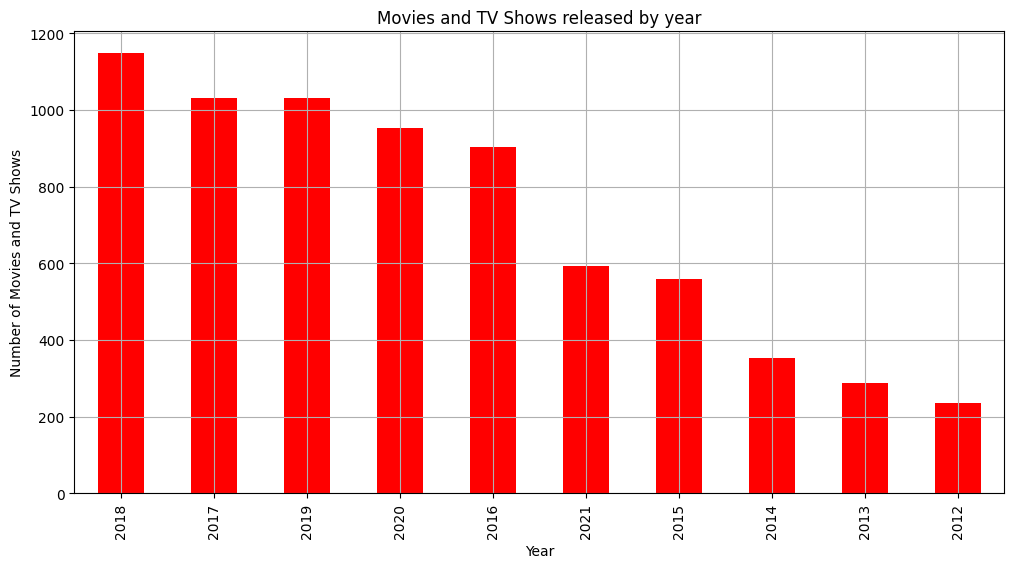

In [41]:
plt.figure(figsize=(12, 6))
df_netflix.nlargest(10).plot(kind='bar', color='red')
plt.title('Movies and TV Shows released by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies and TV Shows')
plt.grid(True)
plt.show()


#### e) Optimización de la gráfica

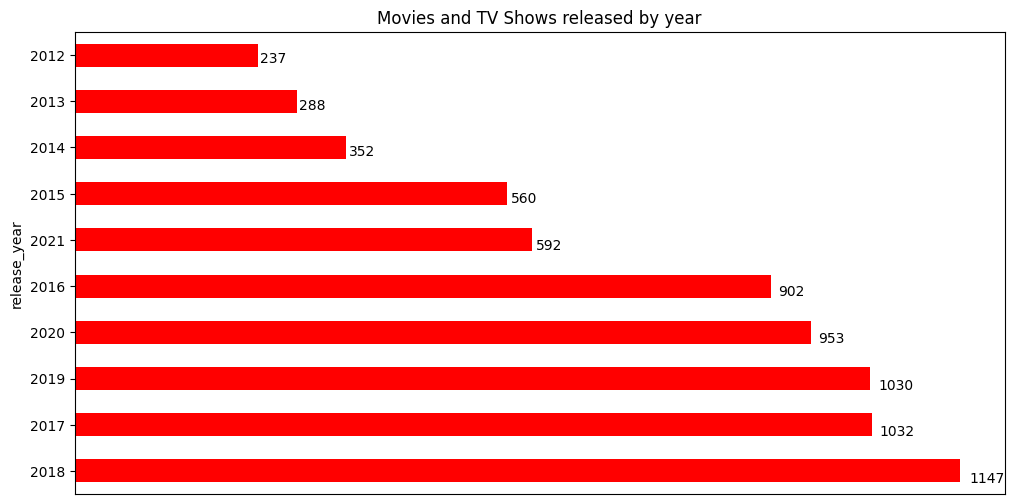

In [52]:
plt.figure(figsize=(12, 6))
ax = df_netflix.nlargest(10).plot(kind='barh', color='red')
plt.title('Movies and TV Shows released by year')
plt.xlabel('Year')
ax.xaxis.set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.01, p.get_y() * 1.01))

plt.show()

#### f) Explicación
Nuevamente, como se quieren visualizar datos por cantidades a través de distintas categorías, se decidió utilizar un gráfico de barras. 
Se tomaron los 10 años con mayores releases para enfocarse únicamente en los que tienen realmente validación o importancia.

Para mejorar la carga cognitiva, se eliminó el eje y pues no es necesario, se explica solo, poner la gráfica de manera horizontal para poder ver de mejor manera los lanzamientos por año. De igual forma, para apoyar mejor, se agregó la cantidad a cada barra.

## Ejercicios Adicionales

### a) Reducción de carga cognitiva: Simplifique la siguiente gráfica:
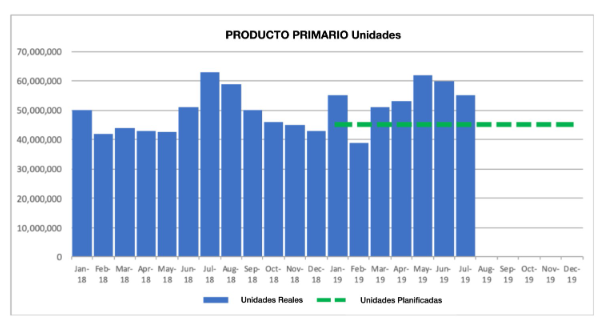

In [53]:
df = pd.read_csv('Depuracion(ventas unitarias).csv')
df.head()

,Fecha,Ventas Reales (unidades),Ventas planificadas (unidades)
0,Jan-18,50000000.0,NaN
1,Feb-18,42000000.0,NaN
2,Mar-18,44000000.0,NaN
3,Apr-18,43000000.0,NaN
4,May-18,42500000.0,NaN


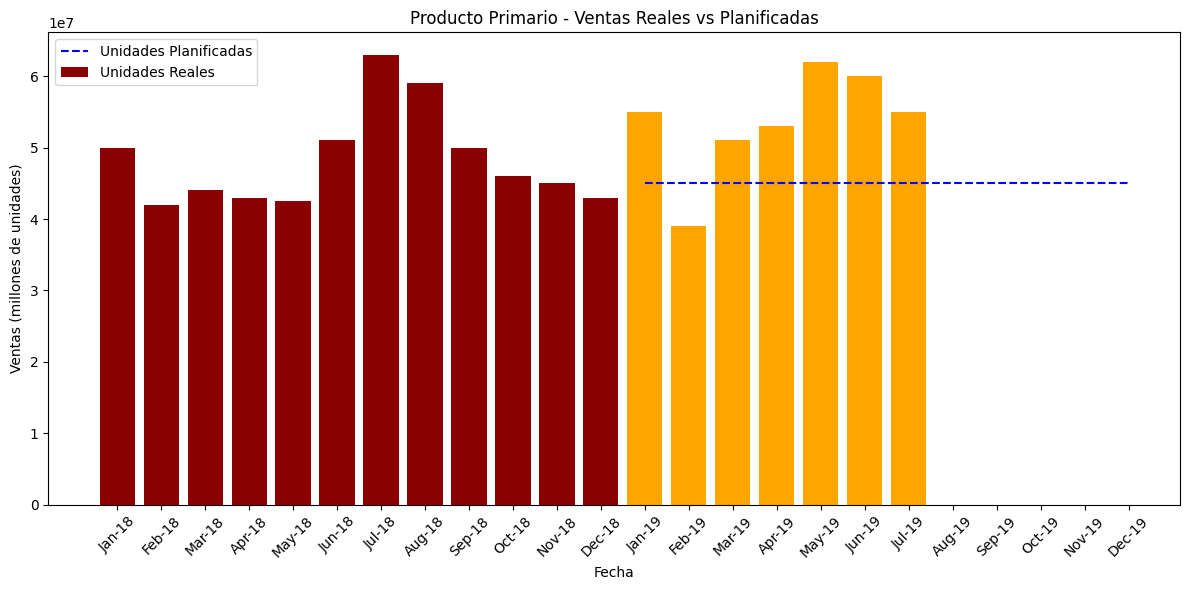

In [71]:
colors = np.where(df['Fecha'].str.contains('18'), 'darkred', 'orange')
plt.figure(figsize=(12, 6))
plt.bar(df['Fecha'], df['Ventas Reales (unidades)'], color=colors, label='Unidades Reales')
plt.plot(df['Fecha'], df['Ventas planificadas (unidades)'], linestyle='--', color='blue', label='Unidades Planificadas')
plt.title('Producto Primario - Ventas Reales vs Planificadas')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.ylabel('Ventas (millones de unidades)')
plt.legend()

plt.grid(False)

plt.tight_layout()
plt.show()

### b) Principios de la Gestalt: Cree una visualización que demuestre al menos dos principios de la Gestalt.

In [84]:
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PC\AppData\Local\P

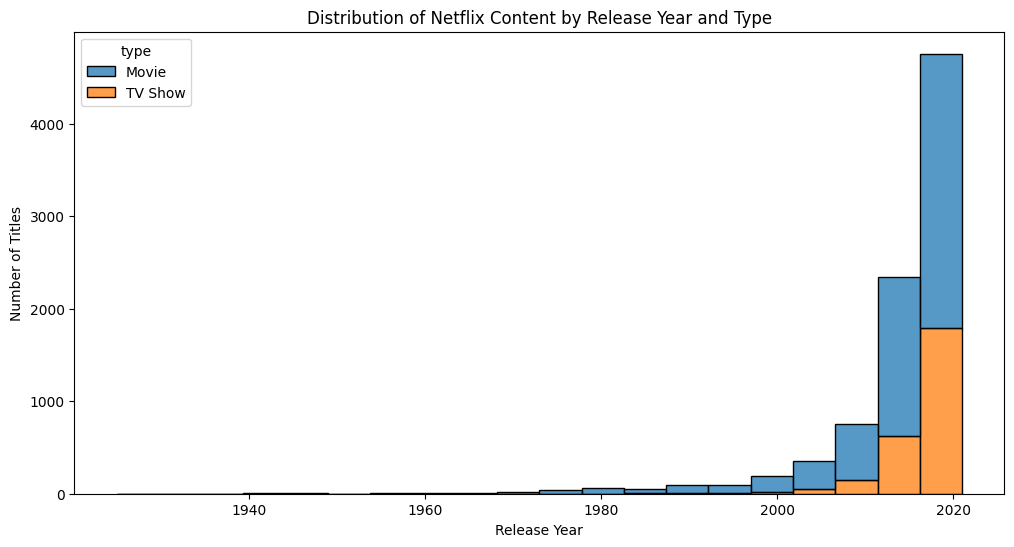

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for visualization, focusing on type and release year
netflix_data_filtered = netflix_data[['type', 'release_year']].dropna()

# Plot settings to demonstrate Gestalt principles
plt.figure(figsize=(12, 6))

# Plotting the number of Movies and TV Shows released each year
sns.histplot(data=netflix_data_filtered, x='release_year', hue='type', multiple='stack', bins=20)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Netflix Content by Release Year and Type')

# Display the plot
plt.show()

En esta visualización se aplican dos principios de la Gestalt: Proximidad y Similitud. El principio de Proximidad se utiliza al agrupar las barras por año de lanzamiento, lo que permite observar la concentración de títulos en años específicos y facilita la percepción de patrones temporales. El principio de Similitud se implementa al diferenciar el tipo de contenido (Películas y Programas de TV) mediante colores distintos, ayudando al espectador a distinguir rápidamente entre las categorías. Esto permite interpretar tendencias de producción de contenido en Netflix de manera intuitiva y eficaz.

### c) Ética en la visualización: 
#### Cree una gráfica que intencionalmente sea engañosa (por ejemplo, manipulando las  escalas) y explique por qué es problemática.

In [87]:
sales_data = pd.read_csv('Depuracion(ventas unitarias).csv')
sales_data.head()

,Fecha,Ventas Reales (unidades),Ventas planificadas (unidades)
0,Jan-18,50000000.0,NaN
1,Feb-18,42000000.0,NaN
2,Mar-18,44000000.0,NaN
3,Apr-18,43000000.0,NaN
4,May-18,42500000.0,NaN


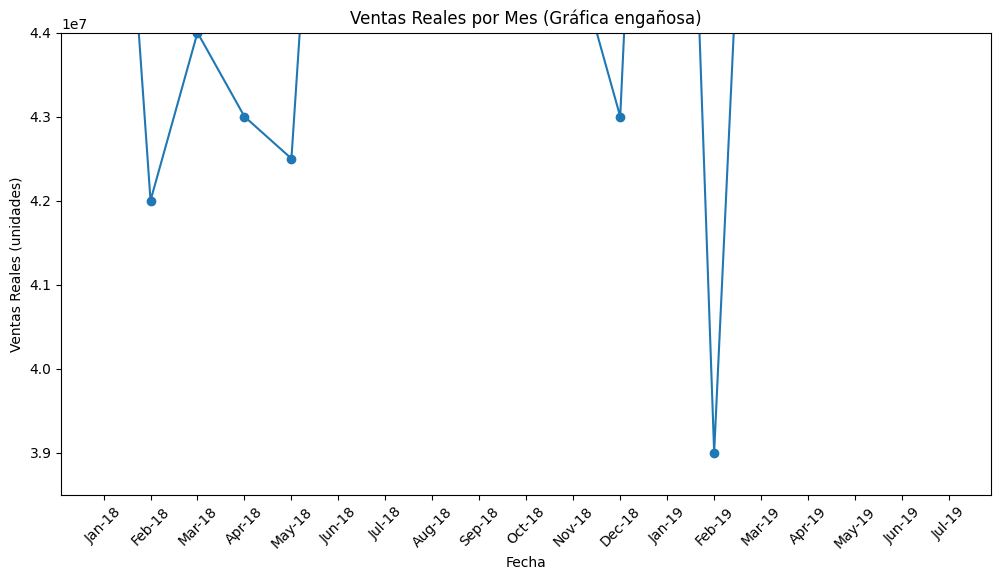

In [88]:
import matplotlib.pyplot as plt

# Filter data to ensure only real sales data is used for the plot
sales_data_filtered = sales_data[['Fecha', 'Ventas Reales (unidades)']].dropna()

# Misleading graph: Set the y-axis to start close to the minimum sales value
plt.figure(figsize=(12, 6))
plt.plot(sales_data_filtered['Fecha'], sales_data_filtered['Ventas Reales (unidades)'], marker='o')

# Set y-axis limits to exaggerate fluctuations
plt.ylim(sales_data_filtered['Ventas Reales (unidades)'].min() - 500000, 
         sales_data_filtered['Ventas Reales (unidades)'].min() + 5000000)

# Add labels and title
plt.xlabel('Fecha')
plt.ylabel('Ventas Reales (unidades)')
plt.title('Ventas Reales por Mes (Gráfica engañosa)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

En esta gráfica, se manipuló el rango del eje y para que inicie cerca del valor mínimo de las ventas y tenga un rango muy estrecho. En lugar de empezar desde cero, el eje y comienza apenas por debajo del valor más bajo de ventas y solo muestra un pequeño rango. Esto exagera las fluctuaciones, haciendo que las diferencias entre los meses parezcan más grandes de lo que realmente son.

Este tipo de manipulación puede llevar a interpretaciones incorrectas, ya que visualmente parece que las ventas varían drásticamente de un mes a otro, cuando en realidad los cambios podrían ser mínimos en términos relativos. Esta técnica puede ser engañosa si se usa para resaltar o alarmar sobre cambios que no son tan significativos.

#### Encuentre un ejemplo real de una visualización engañosa en medios de comunicación y explique cómo podría corregirse.

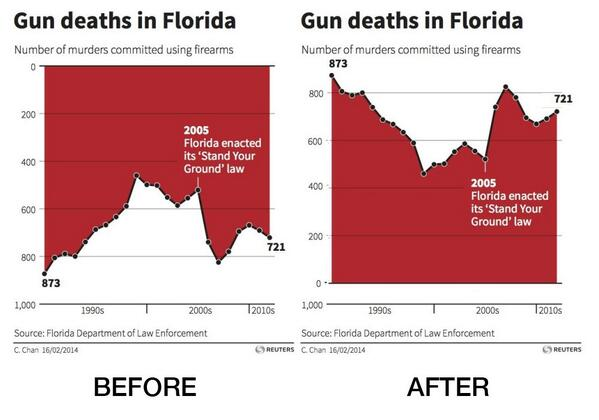
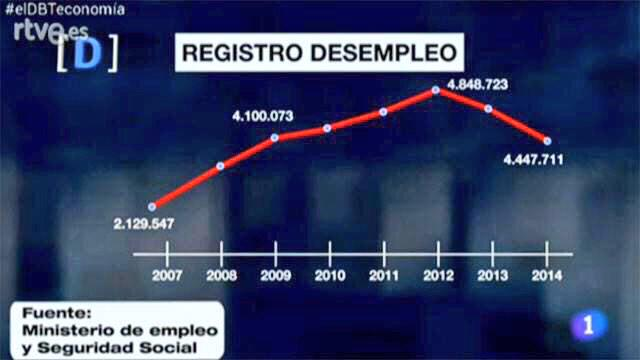

Obtenido de: https://x.com/Gus_802/status/458440334947520512

En 2014, cuando la agencia de noticias Reuters publicó un gráfico sobre las muertes por armas de fuego en Florida.

Problema identificado: La inversión del eje vertical distorsionó la interpretación de los datos, llevando al público a concluir erróneamente que las muertes por armas de fuego habían disminuido, cuando en realidad habían incrementado.

Corrección propuesta: Para representar fielmente la información y evitar confusiones, es esencial que los ejes de los gráficos mantengan una orientación estándar: el eje vertical debe aumentar hacia arriba y el horizontal hacia la derecha. Además, se deben incluir etiquetas claras y precisas en ambos ejes para facilitar la comprensión. Al aplicar estas correcciones, el gráfico reflejará de manera precisa la tendencia real de las muertes por armas de fuego en Florida, permitiendo al público interpretar correctamente la información presentada.

### d) Comparación de visualizaciones: Analice las diferencias entre una visualización con  configuraciones predeterminadas y una optimizada del mismo conjunto de datos

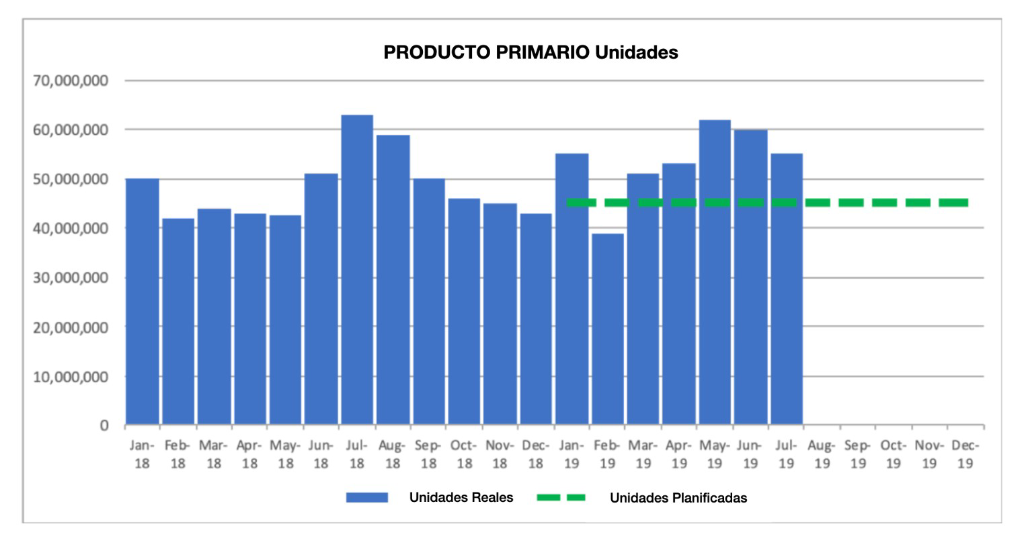

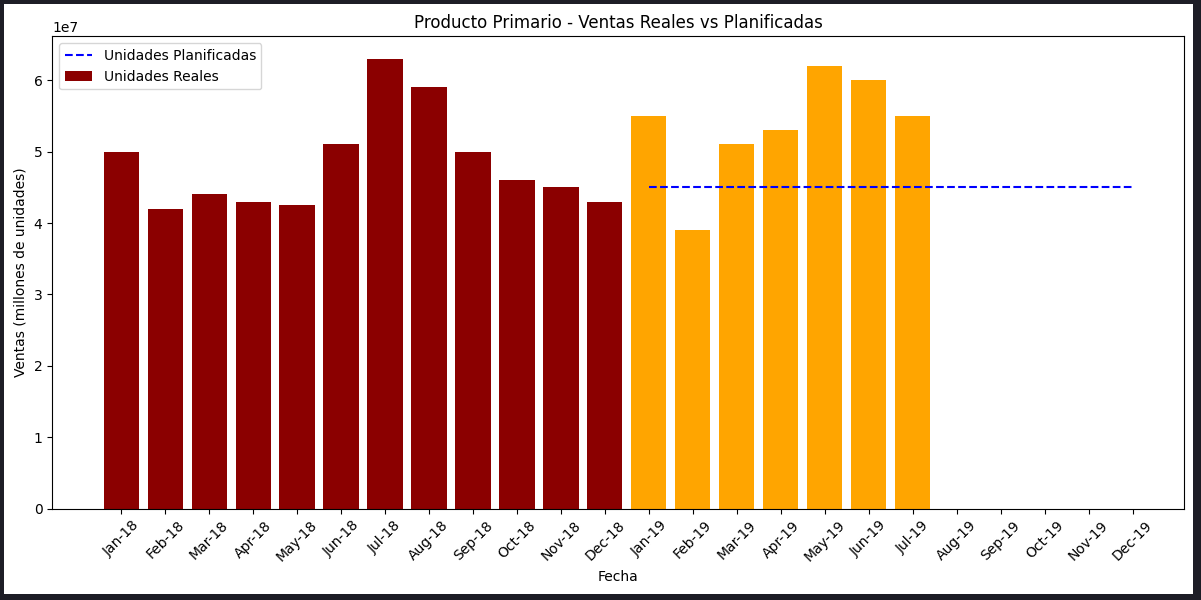
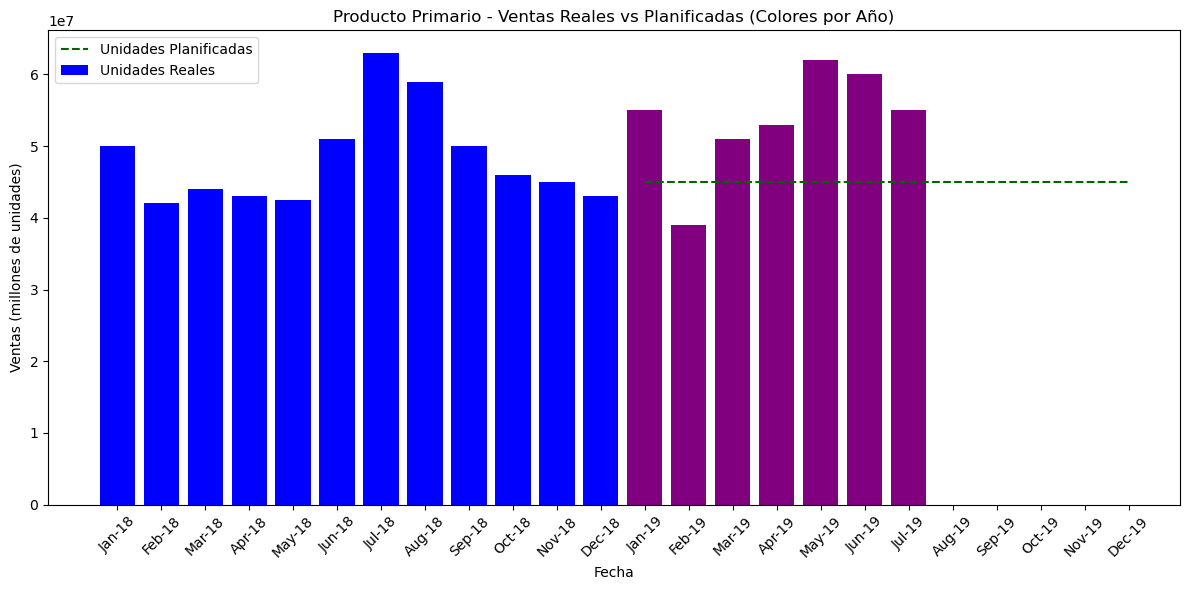

Colores y contraste: La gráfica optimizada utiliza colores más contrastantes (rojo y naranja) para diferenciar claramente las "Unidades Reales" de las "Unidades Planificadas", lo que facilita la comprensión visual. En cambio, la gráfica con configuraciones predeterminadas usa solo un color (azul) para representar las unidades reales, y la línea de unidades planificadas es menos destacada (en verde), lo que podría dificultar su identificación rápida.

Escala y legibilidad del eje Y: En la versión optimizada, el eje Y está en millones de unidades y se ajusta mejor a los datos, mostrando solo los valores necesarios y eliminando posibles confusiones. En la gráfica predeterminada, el eje Y incluye números grandes con comas, lo cual puede dificultar su lectura rápida.

Etiquetas y leyenda: La versión optimizada coloca una leyenda clara en la parte superior de la gráfica y utiliza una línea discontinua en azul para representar las "Unidades Planificadas", lo que proporciona mayor claridad en cuanto a qué representa cada elemento de la gráfica. En comparación, la gráfica predeterminada utiliza una leyenda menos clara, y la diferencia entre las barras y la línea puede ser menos evidente.

Enfoque visual: La gráfica optimizada resalta las diferencias entre las unidades reales y planificadas mediante el uso de colores y formas distintivas, lo cual permite que el usuario identifique rápidamente las áreas en las que las unidades reales difieren de las planificadas. En cambio, la gráfica predeterminada requiere más esfuerzo para interpretar estas diferencias debido a la falta de elementos distintivos.

### e) Atributos preatentivos: Cree una visualización que utilice efectivamente al menos tres atributos preatentivos diferentes

In [91]:
train_data = pd.read_csv("train.csv")
train_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


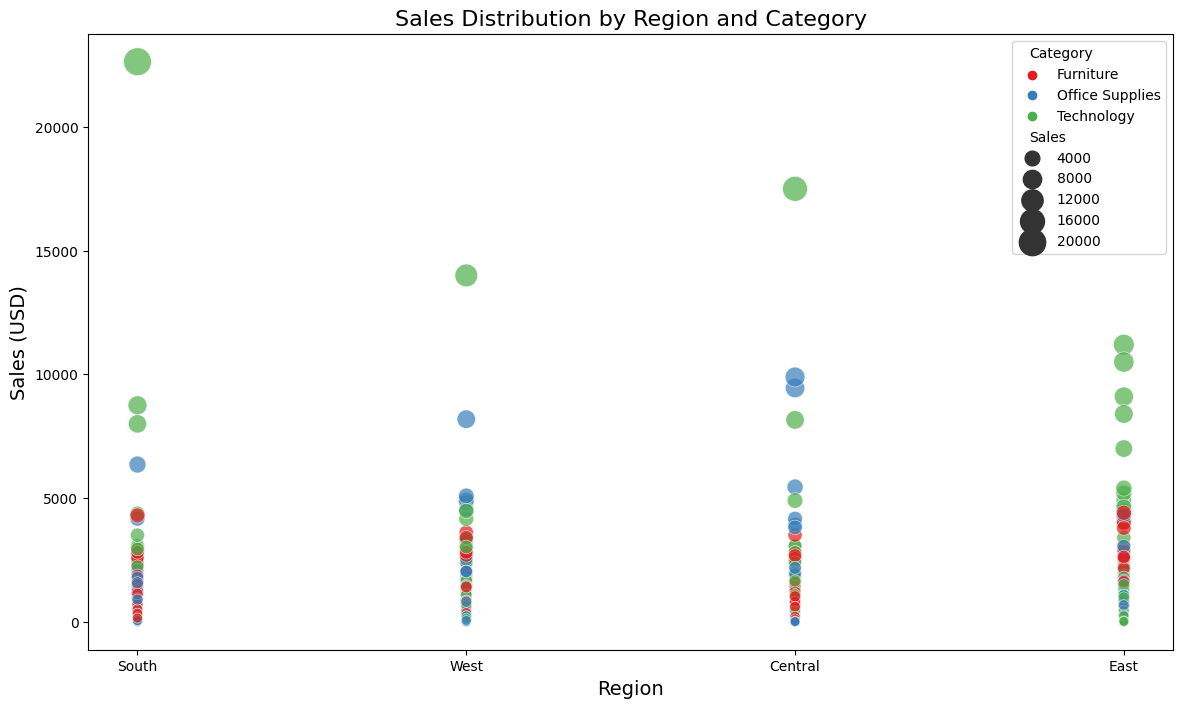

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering data to focus on relevant columns and ensure no missing values
train_data_filtered = train_data[['Region', 'Category', 'Sales']].dropna()

# Set up the visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(data=train_data_filtered, x='Region', y='Sales', hue='Category', size='Sales',
                sizes=(50, 400), alpha=0.7, palette='Set1', edgecolor='w', linewidth=0.5)

# Adding title and labels
plt.title('Sales Distribution by Region and Category', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales (USD)', fontsize=14)

# Display the plot
plt.show()

En esta visualización hemos utilizado tres atributos preatentivos:

Color: Cada categoría de producto ("Furniture", "Office Supplies", "Technology") está representada por un color distinto, lo cual permite identificar rápidamente a qué grupo pertenece cada punto.
Tamaño: Las ventas están representadas en tamaño de los puntos; puntos más grandes indican mayores ventas, permitiendo identificar visualmente las ventas más altas sin necesidad de leer los valores exactos.
Posición: Los puntos están organizados por región en el eje horizontal, lo cual facilita la comparación entre ventas de diferentes categorías en cada región.

### Crítica Constructiva

Principios de Excelencia Gráfica
Claridad y Simplicidad: Las visualizaciones han logrado presentar la información de forma clara. La elección de colores, tamaños y la disposición de los datos permite identificar fácilmente las diferencias entre las categorías y observar patrones en las ventas por región.

Eficiencia Visual: Las visualizaciones emplean atributos preatentivos como el color, tamaño y posición para hacer que los patrones en los datos se perciban rápidamente. La inclusión de estos atributos permite al espectador enfocarse en los puntos clave sin abrumarlo con información irrelevante.

Minimalismo: Las gráficas se mantienen libres de elementos visuales innecesarios, como decoraciones excesivas o distracciones, y destacan solo la información relevante. Los títulos, etiquetas y leyenda están claros, permitiendo al espectador interpretar los datos con facilidad.

Principios de Integridad Gráfica
Representación Precisa de los Datos: En las gráficas no se manipularon los ejes ni se distorsionaron escalas, asegurando que los datos presentados reflejen la realidad sin exageraciones o minimización de las variaciones. Esto permite al espectador confiar en que lo que observa es una representación honesta de los datos.

Proporcionalidad y Comparabilidad: El uso de tamaños en los puntos para representar ventas es proporcional y claro. Los puntos más grandes corresponden a valores mayores, y la leyenda ayuda a interpretar estos tamaños. Esto respeta la integridad de los datos, permitiendo que las comparaciones entre categorías y regiones sean precisas.

Evitar la Ambigüedad: Las etiquetas de los ejes y la leyenda proporcionan contexto, eliminando ambigüedad. El uso de colores diferenciados para cada categoría en la gráfica hace que los datos sean fáciles de entender, sin dar lugar a interpretaciones erróneas.

Recomendaciones para Mejorar
Escalas Estandarizadas: En el caso de la visualización de ventas por mes, asegurarse de que el rango de los ejes sea consistente para cada categoría y que inicie desde cero, con el fin de evitar cualquier posible distorsión visual en futuras interpretaciones.
Agrupación o Segmentación por Periodos: Incluir agrupaciones o un promedio por trimestre podría facilitar la observación de tendencias a lo largo del tiempo, especialmente en análisis de series temporales de ventas.

**Se trabajó con Andrés Quezada y Javier Chavez**